## Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay

## Data Imports

In [2]:
mnist_data = pd.read_csv("data/mnist.csv").to_numpy()
labels = mnist_data[:, 0]
digits = mnist_data[:, 1:]

## Sanity Checks

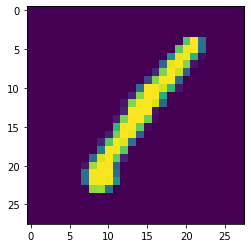

In [3]:
img_size = 28
plt.imshow(digits[0].reshape(img_size, img_size))
plt.show()

## StratifiedKFold & GridSearchCV

In [5]:
def run_predictions(model, model_param_grid, X_train, X_test, y_train, y_test):
        
    folds = StratifiedKFold(5, shuffle=True, random_state = 32)
    
    clf = GridSearchCV(model, model_param_grid, cv = folds, scoring='accuracy')
    clf.fit(X_train, y_train)
    
    
    # try:
    #     feature_importances = clf.best_estimator_.feature_importances_
    # except:
    #     feature_importances = clf.best_estimator_.coef_[0]
        
    # importances = pd.DataFrame(data={
    # 'Attribute': cv.get_feature_names_out(),
    # 'Importance': feature_importances
    # })
    # importances = importances.sort_values(by='Importance', ascending=False)
    # print(importances)
    
    mtrx = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
    preds = clf.predict(X_test)
    return mtrx , clf
#     return {"preds": preds,"clf": clf}